In [67]:
library(data.table)
library(tidyverse)

In [ ]:
##Get HAF's for subsampled reads from hi coverage samples

In [4]:
#Set A
setwd('~/dpetrov/MarkB/Orchard2021Data/18_HAFPipe_Validation/AFSite.A/')
files = list.files(pattern = 'afSite')

In [30]:
#Set A
setwd('~/dpetrov/MarkB/Orchard2021Data/18_HAFPipe_Validation/AFSite.A/')
files = list.files(pattern = 'afSite')
data = data.frame()
for(f in files){
    tp = strsplit(strsplit(f, '_')[[1]][1], 'tp')[[1]][2]
    rep = strsplit(strsplit(f, '_')[[1]][3], '[.]')[[1]][1]
    chr = strsplit(strsplit(f, '_')[[1]][3], '[.]')[[1]][5]
    freqs = fread(f)
    freqs = freqs %>% mutate(tpt = tp, cage = rep, chrom = chr)
    freqs$set = 'A'
    freqs = freqs %>%  mutate(sample = paste0('tp', tp, '_',  cage )) %>%
        dplyr::select(sample, set,tpt, cage, chrom, pos, af) %>% rename(freq = af) 
    data = rbind(data, freqs)
}
data = data %>% dplyr::select(sample, chrom, pos, freq)
sp.data = data %>% spread(sample, freq)
#load RData to get list of sites to filter to get appropriate sites
load('../../RData//orch2021_Baseline_Downsampled_Filtered_Mean.RData')
sp.data = left_join(sites.base, sp.data)

sites = sp.data %>% dplyr::select(chrom, pos)
samps = names(sp.data)
afmat = sp.data %>% dplyr::select(-chrom, -pos)
save(sites, samps, afmat, file = './orch2021_SubSampReads.A.RData')

In [53]:
#Set B
setwd('~/dpetrov/MarkB/Orchard2021Data/18_HAFPipe_Validation/AFSite.B/')
files = list.files(pattern = 'afSite')
data = data.frame()
for(f in files){
    tp = strsplit(strsplit(f, '_')[[1]][1], 'tp')[[1]][2]
    rep = strsplit(strsplit(f, '_')[[1]][3], '[.]')[[1]][1]
    chr = strsplit(strsplit(f, '_')[[1]][3], '[.]')[[1]][5]
    freqs = fread(f)
    freqs = freqs %>% mutate(tpt = tp, cage = rep, chrom = chr)
    freqs$set = 'B'
    freqs = freqs %>%  mutate(sample = paste0('tp', tp, '_',  cage )) %>%
        dplyr::select(sample, set,tpt, cage, chrom, pos, af) %>% rename(freq = af) 
    data = rbind(data, freqs)
}
data = data %>% dplyr::select(sample, chrom, pos, freq)
sp.data = data %>% spread(sample, freq)
#load RData to get list of sites to filter to get appropriate sites
load('../../RData//orch2021_Baseline_Downsampled_Filtered_Mean.RData')
sp.data = left_join(sites.base, sp.data)

sites = sp.data %>% dplyr::select(chrom, pos)
samps = names(sp.data)
afmat = sp.data %>% dplyr::select(-chrom, -pos)
save(sites, samps, afmat, file = './orch2021_SubSampReads.B.RData')

Joining with `by = join_by(chrom, pos)`


In [68]:
#compare freqs
setwd('~/dpetrov/MarkB/Orchard2021Data/18_HAFPipe_Validation/')

In [69]:
load('./AFSite.A/orch2021_SubSampReads.A.RData')
set.a = afmat
load('./AFSite.B/orch2021_SubSampReads.B.RData')
set.b = afmat

In [72]:
data.11 = data.frame()
for (col in 1:6){
    df = as.data.frame(cbind(set.a[,col], set.b[,col]))
    data.11 = rbind(data.11, df) 
    
}

In [74]:
plot(data.11$V1, data.11$V2)

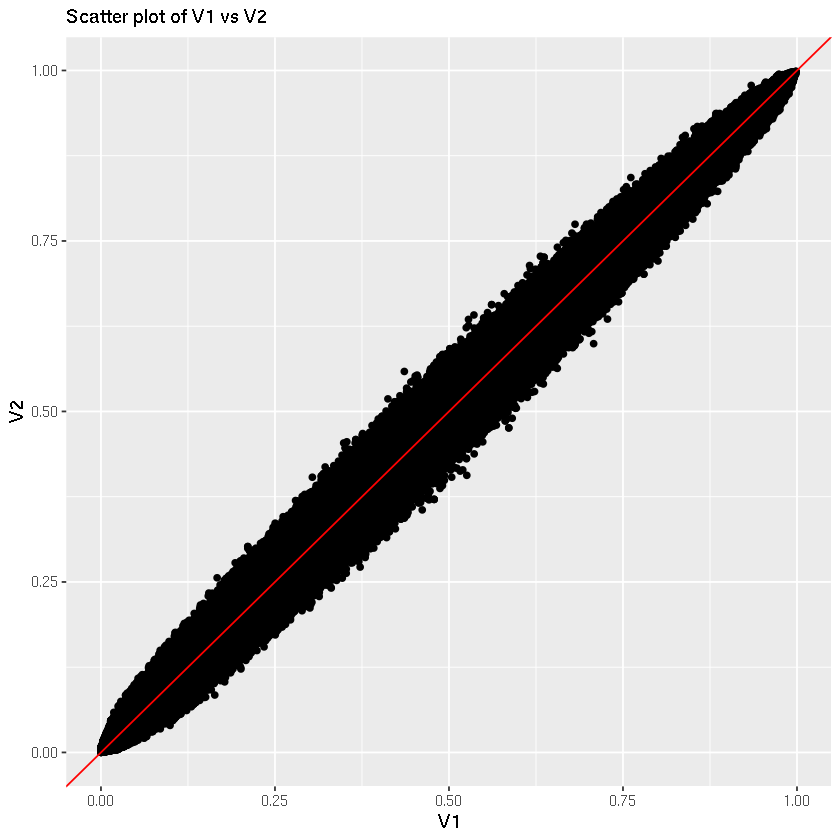

In [75]:
ggplot(data.11, aes(x = V1, y = V2)) +
  geom_point() +  # Add points
  geom_abline(intercept = 0, slope = 1, color = "red") +  # Add 1:1 line
  labs(title = "Scatter plot of V1 vs V2", x = "V1", y = "V2")  # Labels